<a href="https://colab.research.google.com/github/RishitParija/ML/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
tr=pd.read_csv("/content/train.csv")
te=pd.read_csv("/content/test.csv")

In [60]:
tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
te.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
te.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:

tr.drop(columns=['Name','Ticket'],inplace=True)

In [63]:
tr.drop(columns=['PassengerId'],inplace=True)

In [26]:
tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [22]:
te.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [14]:
tr['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [65]:
tr.corr()['Survived']

<ipython-input-65-4f145233a0d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tr.corr()['Survived']


Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [32]:
tr['Cabin'].isnull().sum()
tr.shape

(891, 9)

In [66]:
tr.drop(columns=['Cabin'],inplace=True)

In [67]:
te.drop(columns=['Cabin'],inplace=True)

In [45]:
tr.head()
te.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


In [68]:
te['Sex']=te['Sex'].str.replace('male','1');
te['Sex']=te['Sex'].str.replace('female','0');
te['Sex']=te['Sex'].str.replace('fe1','0');
te['Sex']=te['Sex'].astype('int32')

In [69]:
tr['Sex']=tr['Sex'].str.replace('male','1');
tr['Sex']=tr['Sex'].str.replace('female','0');

In [70]:
tr['Sex']=tr['Sex'].str.replace('fe1','0');

In [71]:
tr['Sex']=tr['Sex'].astype('int32')

In [72]:
tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [73]:
te.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


In [48]:
tr['Embarked'].value_counts()
te['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [74]:
tr['Embarked']=tr['Embarked'].str.replace('S','1')
tr['Embarked']=tr['Embarked'].str.replace('C','2')
tr['Embarked']=tr['Embarked'].str.replace('Q','3')
te['Embarked']=te['Embarked'].str.replace('S','1')
te['Embarked']=te['Embarked'].str.replace('C','2')
te['Embarked']=te['Embarked'].str.replace('Q','3')

In [52]:
tr['Embarked'].value_counts()

1    644
2    168
3     77
Name: Embarked, dtype: int64

In [53]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


In [75]:
tr['Age'].isnull().sum()

177

In [88]:
tr['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [87]:
tr['Age']=tr['Age'].astype('float64')


In [85]:
tr["Age"] = tr["Age"].fillna('0')

In [80]:
tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [90]:
tr['Embarked']=tr['Embarked'].astype('float64')

In [91]:
te['Embarked']=te['Embarked'].astype('float64')

In [92]:
tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [93]:
te.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,3.0
1,893,3,0,47.0,1,0,7.0000,1.0
2,894,2,1,62.0,0,0,9.6875,3.0
3,895,3,1,27.0,0,0,8.6625,1.0
4,896,3,0,22.0,1,1,12.2875,1.0


In [94]:
tr.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.108669
Name: Survived, dtype: float64

In [117]:
te['Age']=tr['Age'].fillna(0.0)

In [131]:
tr.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [158]:
tr['Embarked']=tr['Embarked'].astype('str')

In [159]:
tr['Embarked'].fillna('0.01')

0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    2.0
890    3.0
Name: Embarked, Length: 891, dtype: object

In [166]:
tr.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [163]:
tr.dropna(subset=['Embarked'],inplace=True)

In [165]:
tr['Embarked']=tr['Embarked'].astype('float64')

### MAKING THE MODEL

In [95]:
import seaborn as sns

<Axes: >

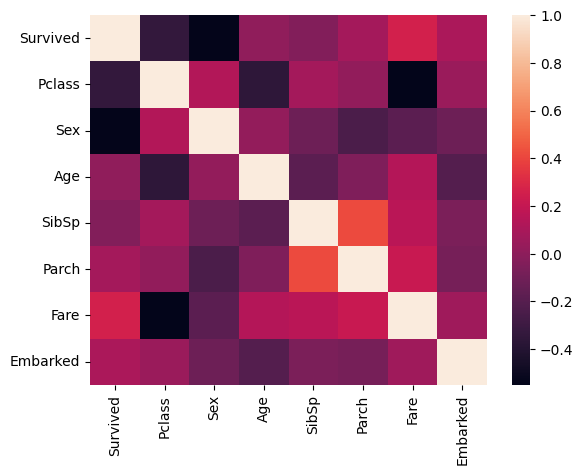

In [118]:
sns.heatmap(tr.corr())

In [167]:
X=tr.drop(columns=['Survived'])
Y=tr['Survived']


In [168]:
X_test1=te.drop(columns=['PassengerId'])



In [184]:
X_test1['Fare']=X_test1['Fare'].astype('str')


In [187]:
X_test1['Fare']=X_test1['Fare'].astype('float32')


In [185]:
X_test1.fillna("0.01")


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,0,0,7.8292,3.0
1,3,0,38.0,1,0,7.0,1.0
2,2,1,26.0,0,0,9.6875,3.0
3,3,1,35.0,0,0,8.6625,1.0
4,3,0,35.0,1,1,12.2875,1.0
...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.05,1.0
414,1,0,44.0,0,0,108.9,2.0
415,3,1,0.0,0,0,7.25,1.0
416,3,1,34.0,0,0,8.05,1.0


In [192]:
X_test1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [191]:
# Fill NaN values in 'Column1' with the median of the column
X_test1['Fare'] = X_test1['Fare'].fillna(X_test1['Fare'].median())


In [194]:
pid=pd.DataFrame(te['PassengerId'])

In [121]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1.0
1,1,0,38.0,1,0,71.2833,2.0
2,3,0,26.0,0,0,7.9250,1.0
3,1,0,35.0,1,0,53.1000,1.0
4,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1.0
887,1,0,19.0,0,0,30.0000,1.0
888,3,0,0.0,1,2,23.4500,1.0
889,1,1,26.0,0,0,30.0000,2.0


In [101]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [142]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [110]:
y_train

723    0
423    0
795    0
304    0
400    1
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 757, dtype: int64

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=2,shuffle=True)

In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [130]:
X_train.fillna(0.0)
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

LINEAR REGRESSION

In [171]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.371190708993796
Mean Absolute Error:  0.309005878832608


## KNN

In [174]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.16678788915985698
Mean Absolute Error:  0.3603411513859274


## DECISON TREE

In [198]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=7)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,np.round(y_train))

y_pred = pipe.predict(X_test)
print('R2 score: ',r2_score(y_test,np.round(y_pred)))
print('Mean Absolute Error: ',mean_absolute_error(y_test,np.round(y_pred)))

R2 score:  0.15723270440251602
Mean Absolute Error:  0.20149253731343283


In [212]:
pid

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


## Random Forest

In [219]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=187,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=19)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,np.round(y_train))

y_pred = np.round(pd.DataFrame(pipe.predict(X_test1)))
y_pred=y_pred.astype('int32')
y_pred.columns=['Survived']

y_pred


,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [218]:
pid

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [223]:
result=pd.concat([pid,y_pred],axis=1)
result

In [232]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [231]:
result.to_csv('Result.csv',index=False)

In [202]:
y_train

723    0
424    0
795    0
305    1
401    0
      ..
535    1
585    1
494    0
528    0
169    0
Name: Survived, Length: 755, dtype: int64

In [209]:
result

,PassengerId,0
0,892.0,NaN
1,893.0,NaN
2,894.0,NaN
3,895.0,NaN
4,896.0,NaN
...,...,...
413,NaN,0.0
414,NaN,1.0
415,NaN,0.0
416,NaN,0.0


## XGBOOST

In [178]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=120,max_depth=5,learning_rate=0.29)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.31428209843288635
Mean Absolute Error:  0.2673437572049616
